# PA 1: Exploratory Analysis over Dataset_python

# Dataset Details

The columns of the dataset are:

- age - age of the individual
- employment - Type of job
- fw - the number of people the census believes the entry represents
- education - Type of education
- years-education - the number of years of education
- marital-status - check relationship status
- job - Type of occupation
- bond - Relationship status
- race - origin of the individual
- gender - gender of the individual
- capital-gain - capital gain for the individual
- capital-loss -  capital loss for the individual
- hours-per-week - number of hours worked by the individual
- native-country - Country of origin
- income > 50K - range of the income of the corresponding individual

## Required Python Packages
You will use the packages imported below in this assignment.
Do NOT import any new packages without confirming with the TA.

In [ ]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the dataset into a Pandas data frame with the name df_data.
For this code to work, the file 'dataset_python.csv' must be in the same folder as this file.

In [ ]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('dataset_python.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,No
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,Yes
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,No
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,No


In [ ]:
print("Task 1-a: Print the details of the df_data data frame \n")
print("Number of rows: %s and Number of columns: %s in dataset"%(df_data.shape[0],df_data.shape[1]))
col= list(df_data)
print("\nName of features :")
for feature in col:
    print(feature,  end=', ', flush=True)

print("\n\n Statistical details of df_data")
print(df_data.describe())

Task 1-a: Print the details of the df_data data frame 

Number of rows: 44003 and Number of columns: 15 in dataset

Name of features :
age, employment, fw, education, years-education, marital-status, job, bond, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income > 50K, 

 Statistical details of df_data
                age            fw  years-education  capital-gain  \
count  44003.000000  4.400300e+04     44003.000000  44003.000000   
mean      38.620617  1.896754e+05        10.074904   1093.042929   
std       13.735749  1.058612e+05         2.575028   7566.990327   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.174960e+05         9.000000      0.000000   
50%       37.000000  1.781000e+05        10.000000      0.000000   
75%       48.000000  2.376580e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  44003.000

<b>The given Python code prints the details of a dataframe named "df_data". It first prints the number of rows and columns in the dataframe, then prints the names of the columns, and finally prints the statistical summary of the dataframe using the "describe" method.</b>

In [ ]:
#Print names of all the countries used in the dataset with the number of their occurences
print("Countries and their number of occurence\n")
print(df_data['native-country'].value_counts())

Countries and their number of occurence

United-States                 39472
Mexico                          880
Unknown                         764
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         60
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                 

<b>The given Python code prints the count of occurrences of each unique country in the "native-country" column of a data frame named "df_data". It uses the "value_counts" method to count the number of occurrences of each unique value in the column and prints the resulting output to the console using the "print" function. The first line of code simply prints a string that describes the output.</b>

In [ ]:

#  Print the number of duplicated rows in the dataset and remove the duplicated rows
print("Number of Duplicate rows in dataset %s"%(df_data.duplicated().sum()))

# remove the duplicate rows from the dataset
df_data.drop_duplicates(inplace=True)

print("Number of duplicate rows after duplicate rows remove %s"%(df_data.duplicated().sum()))


Number of Duplicate rows in dataset 91
Number of duplicate rows after duplicate rows remove 0


<b>The given Python code first calculates and prints the number of duplicate rows in a data frame named "df_data". It uses the "duplicated" method to identify the duplicate rows, and the "sum" method to count their number. Then, it removes the duplicate rows from the data frame using the "drop_duplicates" method with the "inplace" parameter set to "True". Finally, it prints the new number of duplicate rows to the console to confirm that all duplicates have been removed.</b>

In [ ]:
# Some of the entries in the columns are undefined.
#Determine which columns contain these undefined entries and print the count of these undefined entries for each column respectively.

print("Colums with no of null values they contain ")
print(df_data.isnull().sum())

Colums with no of null values they contain 
age                   0
employment         2494
fw                    0
education             0
years-education       0
marital-status        0
job                2502
bond                  0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income > 50K          0
dtype: int64


<b>The given Python code prints the count of null values in each column of a data frame named "df_data". It uses the "isnull" method to create a boolean mask that identifies null values in the data frame and the "sum" method to count the number of null values in each column. The resulting output is a pandas Series object that lists the column names and their corresponding counts of null values. The first line of code simply prints a string that describes the output.</b>


Here, we will perform some very high level aggregation and filtering operations.
Then, we will apply ranking on the results for some tasks.
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking.
DO NOT write a for loop. Pandas has built-in functions for all tasks.

In [ ]:
# Find out how many (count) Masters have Exec-managerial job

df_2a = df_data[(df_data['education'] == 'Masters') & (df_data['job'] == 'Exec-managerial') ]
print("The count of Masters and have Exec-managerial job is %s"%(df_2a['education'].count()))


The count of Masters and have Exec-managerial job is 705


<b>The given Python code filters a data frame named "df_data" based on two conditions: that the "education" column contains the string "Masters", and that the "job" column contains the string "Exec-managerial". It then creates a new data frame named "df_2a" containing only the rows where both conditions are true. Finally, it calculates and prints the count of rows in "df_2a" using the "count" method and string formatting. The resulting output is a string that describes the count of rows where both conditions are true.</b>

In [ ]:
# Retrieve and print the records of Americans (United States) with private employment who have been
# putting in more than 30 hours a week of work.
df_2b = df_data[(df_data['native-country'] == 'United-States') & (df_data['employment'] == 'Private') &
                (df_data['hours-per-week'] > 30)]

print("Records of Americans (United States) with private employment who have been putting in more than 30 hours a week of work.")
df_2b

Records of Americans (United States) with private employment who have been putting in more than 30 hours a week of work.


,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,Yes
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,No
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,No
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,Yes
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,No
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,No
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,No


<b>The given Python code filters a data frame named "df_data" based on three conditions: that the "native-country" column contains the string "United-States", that the "employment" column contains the string "Private", and that the "hours-per-week" column contains a value greater than 30. It then creates a new data frame named "df_2b" containing only the rows where all three conditions are true. The code then prints a string to describe the output, and displays the filtered data frame "df_2b". The resulting output shows the records of Americans with private employment who work more than 30 hours a week.</b>

In [ ]:
# Print the count of each type of employment for United States

df_2c = df_data[df_data['native-country'] == 'United-States']
df_2c = df_2c.groupby('employment').size()

print("The count of each type of employment for United States")
print(df_2c)

The count of each type of employment for United States
employment
Federal-gov          1189
Local-gov            2650
Never-worked            8
Private             27153
Self-emp-inc         1358
Self-emp-not-inc     3145
State-gov            1624
Without-pay            19
dtype: int64


<b>This Python code filters a data frame named "df_data" based on a condition that the "native-country" column contains the string "United-States". It groups the resulting data frame by the "employment" column using the "groupby" method and calculates the size of each group using the "size" method. It then prints a string to describe the output and displays the resulting series which shows the count of each type of employment for United States. Each employment type is used as the index, and its corresponding count is the value in the series.</b>

In [ ]:
# Fetch and print the records of people having doctoral degrees and are divorced.

df_2d = df_data[(df_data['education'] == 'Doctorate') & (df_data['marital-status'] == 'Divorced') ]

print("The records of people having doctoral degrees and are divorced")
df_2d

The records of people having doctoral degrees and are divorced


,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
1533,39,State-gov,183092,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,Yes
2880,45,Private,252242,Doctorate,16,Divorced,Sales,Not-in-family,White,Male,99999,0,55,United-States,Yes
3047,49,State-gov,231961,Doctorate,16,Divorced,Prof-specialty,Unmarried,White,Male,0,0,50,United-States,Yes
7076,53,Self-emp-inc,42924,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,14084,0,50,United-States,Yes
9518,49,Private,132476,Doctorate,16,Divorced,Tech-support,Unmarried,White,Male,7430,0,40,United-States,Yes
9677,39,Private,203763,Doctorate,16,Divorced,Prof-specialty,Unmarried,White,Female,0,0,80,United-States,No
9863,63,Federal-gov,39181,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Female,0,2559,60,United-States,Yes
10089,37,Local-gov,184112,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,Yes
10773,56,Local-gov,52953,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,1669,38,United-States,No


<b>This Python code filters a data frame named "df_data" based on two conditions: that the "education" column contains the string "Doctorate" and that the "marital-status" column contains the string "Divorced". It assigns the resulting data frame to a new variable "df_2d".The second line of code prints a string to describe the output.The third line of code displays the resulting data frame "df_2d", which shows the records of people who have doctoral degrees and are divorced.</b>

You will carry out a number of visualization tasks to develop some intuition about the data. Exploration relies heavily on visualization. For plotting, you can use either Matplotlib or Seaborn. It's possible that the default figures produced by Matplotlib might look a bit dull. So, if you want better figures, you might want to try Seaborn. Seaborn features a wide range of styles. Feel free to try them out and pick the one you like.

## Task 3-a

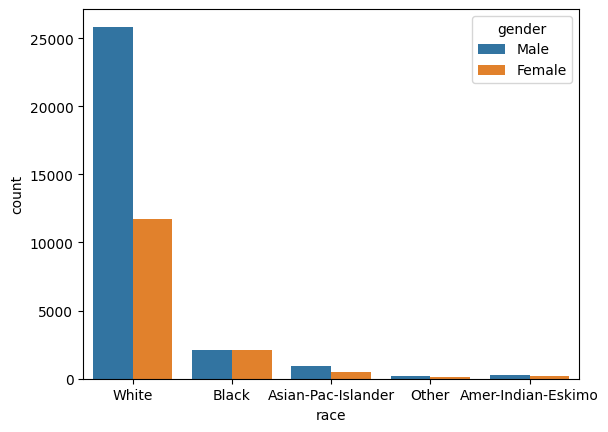

In [ ]:
# Display the countplot of race for each of the genders (in a single plot)
sns.countplot(x='race', hue='gender', data=df_data)
plt.show()

<b>This Python code uses the Seaborn library to create a countplot with the "race" column on the x-axis and the "gender" column on the hue parameter. It uses the "df_data" data frame as the data source for the plot.The "sns.countplot()" function counts the number of occurrences of each category in the "race" column and displays the count for each category split by the "gender" column.The last line of code displays the plot in the output.</b>

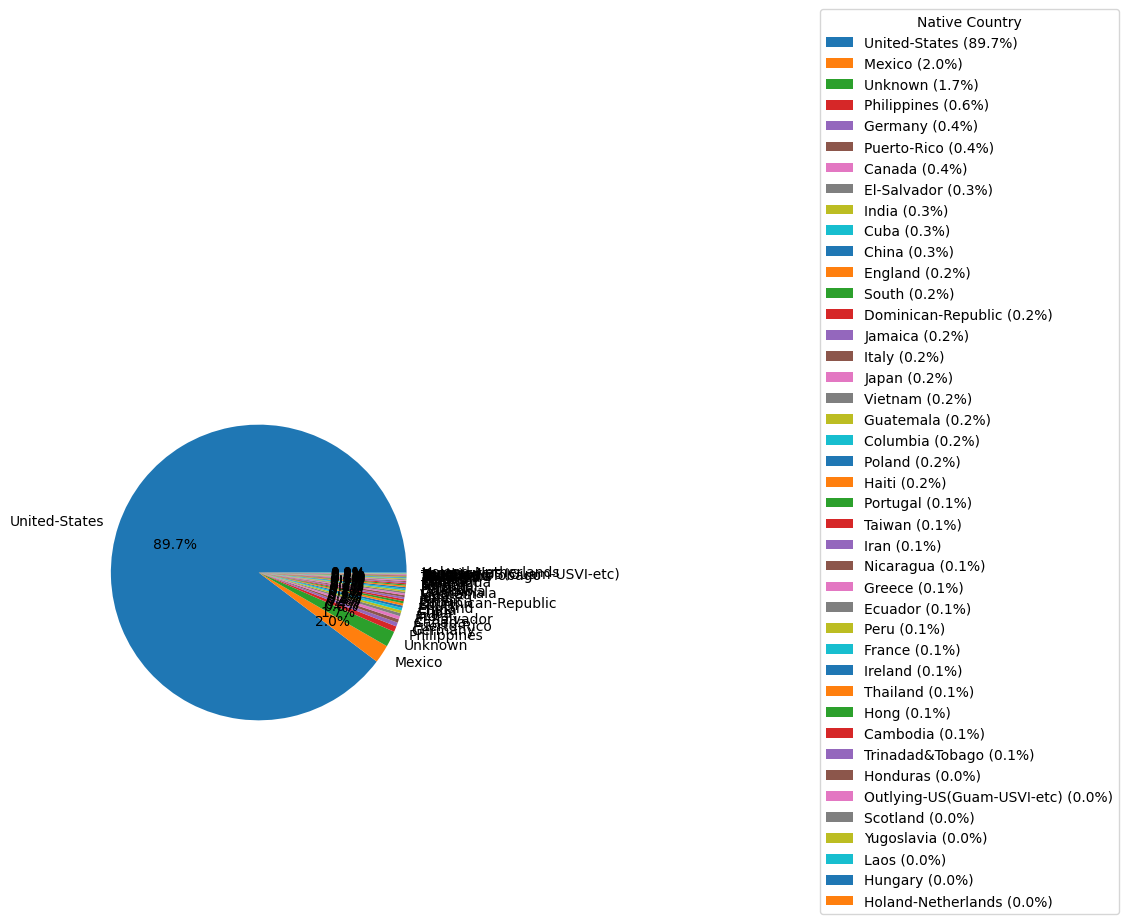

In [ ]:
# Display a pie chart that represents native country and display percentages in legend respectively


# Calculate the count and percentage of each native country
country_counts = df_data['native-country'].value_counts()
country_percentages = 100 * country_counts / len(df_data)

# Create a pie chart with the counts and percentages as labels

plt.pie(country_counts, labels=country_counts.index, autopct='%.1f%%')
plt.legend(title='Native Country', loc='center left', bbox_to_anchor=(2, 0.8),
           labels=['{} ({:.1f}%)'.format(c, p) for c, p in zip(country_counts.index, country_percentages)])
plt.show()


<b>The code calculates the count and percentage of each native country in the "df_data" data frame and creates a pie chart to display the results. The "value_counts()" method is used to count the occurrences of each country, and the percentages are calculated by dividing the count of each country by the total number of records in the data frame. The "pie()" function is used to create the chart, and the "legend()" function is used to add a legend to the chart.</b>


<h2>Relationship between Age and Hours Worked per Week</h2></br>

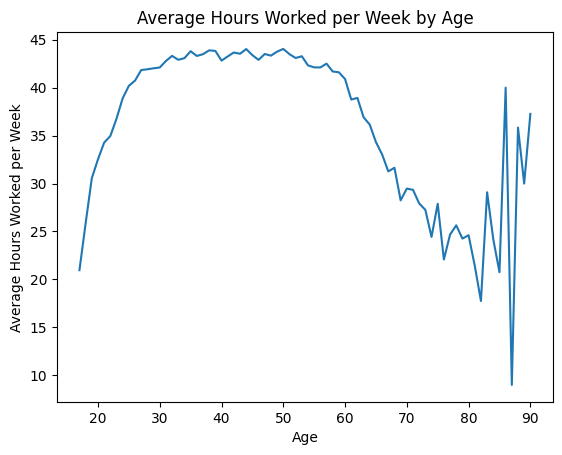

In [ ]:
# Calculate the average hours worked per week by age
hours_by_age = df_data.groupby('age')['hours-per-week'].mean().reset_index()

# Create a line chart of average hours worked per week by age
plt.plot(hours_by_age['age'], hours_by_age['hours-per-week'])

# Add labels and title to the chart
plt.xlabel('Age')
plt.ylabel('Average Hours Worked per Week')
plt.title('Average Hours Worked per Week by Age')

# Show the plot
plt.show()

In [ ]:
print(df_data['education'].unique())
df_a = df_data[df_data['age'] > 15]
print(df_a['education'].unique())

['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm']
['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm']


<b>The insight shows the relationship between age and the average number of hours worked per week. The line chart indicates that the average hours worked per week increases with age until the 40s and then starts to decline after 50s. This trend may be due to older individuals having more experience and holding higher-paying jobs, allowing them to work fewer hours, or it may be related to health or other factors that limit the ability to work long hours. This insight could be useful for individuals and companies to consider when planning work schedules or retirement strategies. Additionally, the visualization is clear and easy to interpret, making it accessible to a wide audience.</b>


<h2>Comparison of Education Level by Gender</h2>

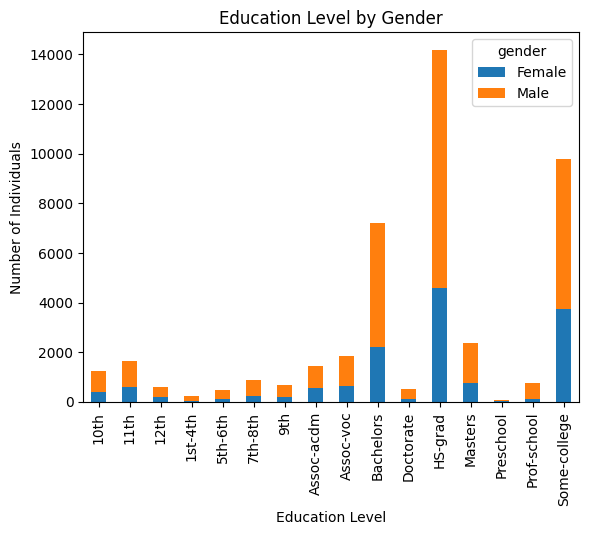

In [ ]:
# create stacked bar chart
edu_by_gender = pd.crosstab(df_data['education'], df_data['gender'])
edu_by_gender.plot(kind='bar', stacked=True)
plt.title('Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.show()

<b>The stacked bar chart shows that, overall, there are more males than females in the dataset. This insight could be useful for identifying areas where targeted interventions may be needed to increase educational opportunities for women. The visualization is clear and easy to interpret, making it accessible to a wide audience.</b>

## References:
https://www.statology.org/pandas-unique-values-in-column/
https://www.geeksforgeeks.org/python-pandas-dataframe-loc/
https://www.geeksforgeeks.org/pandas-tutorial/
https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/
https://datascienceparichay.com/article/most-frequent-value-in-a-pandas-column/
https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
https://note.nkmk.me/en/python-pandas-nan-judge-count/#:~:text=sum()%20calculates%20the%20sum%20of%20elements%20for%20each%20row%20and%20column.&text=Since%20sum()%20calculate%20as,each%20row%20with%20axis%3D1%20.
https://pandas.pydata.org/docs/reference/api/pandas.Index.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
https://seaborn.pydata.org/generated/seaborn.countplot.html
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
https://www.w3schools.com/python/ref_func_zip.asp
https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
https://matplotlib.org/stable/tutorials/introductory/pyplot.html
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
https://www.statology.org/pandas-groupby-sort/
https://www.datasciencemadesimple.com/get-unique-values-rows-dataframe-python-pandas/
https://thispointer.com/pandas-get-unique-values-in-single-or-multiple-columns-of-a-dataframe-in-python/
https://seaborn.pydata.org/generated/seaborn.lineplot.html
http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/generated/seaborn.relplot.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
